# US

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
from rl.memory import SimpleMemory
from rl.utils.plot import plot_action_distribution
import gym
from rl.utils.env import populate_env
env = populate_env(gym.make("MountainCarContinuous-v0"))

def get_memory(path):
    memory = SimpleMemory.from_file(
    limit=1000000,
    env=env,
    file_path=path)
    return(memory)

Using TensorFlow backend.
[2017-11-21 16:22:35,594] Making new env: MountainCarContinuous-v0


In [9]:
def plot_memory(memory):
    plt.figure(1, figsize=(13,20))
    plt.xlabel("position")
    plt.ylabel("velocity")
    plt.title("Content of the replay buffer")

    actions = []
    states = []
    rewards = []

    for experience in memory.dump():
        actions.append(experience.action)
        states.append(experience.state0)
        rewards.append(experience.reward)
    states = np.array(states)
    sb.distplot(actions, kde=False)
    #sb.jointplot(states[:,0], states[:,1], kind="hex", stat_func=None)
    plt.set_cmap('jet')
    plt.scatter(states[:,0], states[:,1], s=1, c=rewards)
    plt.colorbar(label="rewards")
    plt.show()
    return rewards

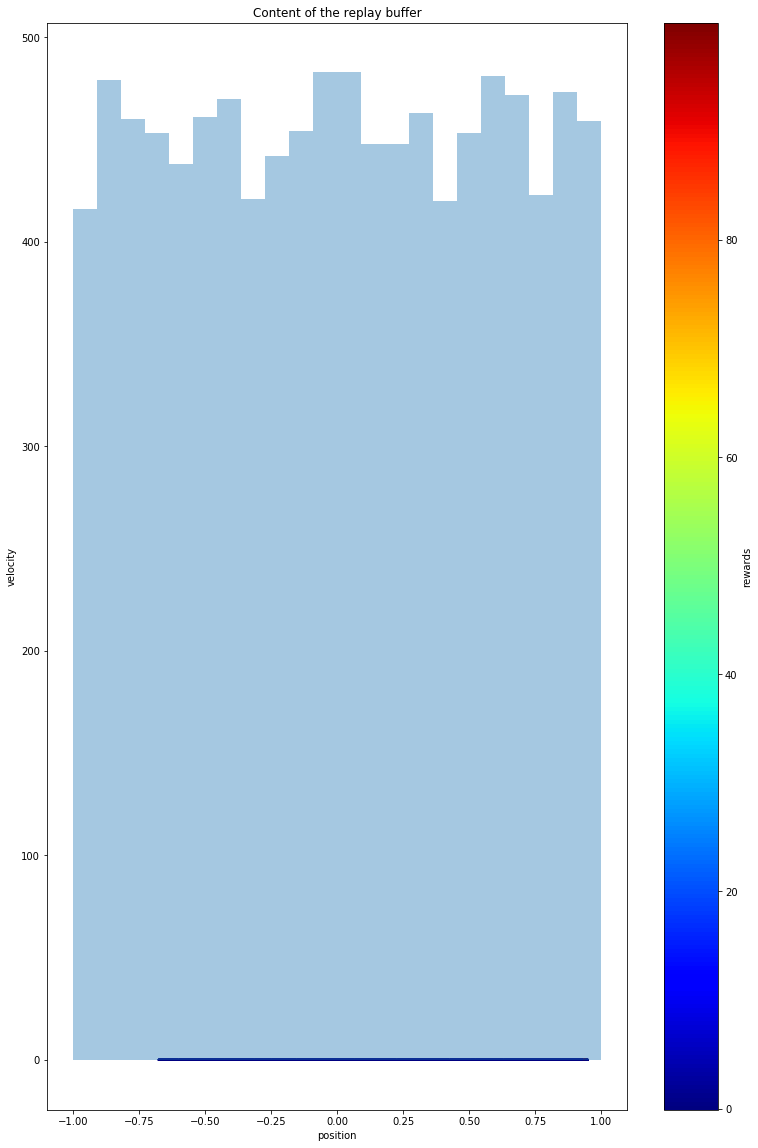

In [10]:
path = "../data/replay_buffer_us_sparse.p"
memory = get_memory(path)
rewards = plot_memory(memory)

In [6]:
print (actions)

NameError: name 'actions' is not defined

In [4]:
cpt = 0
for i in rewards:
    if i>0:
        cpt +=1
print (cpt)
print (len(rewards))

10
106521
